# Laboratory Work 2

---

### **Topic**: 
#### 🖥️ *Data exploration and visualization with Python*

---

### **Goal**:
#### 🎯 *Gain basic skills in using Python for data exploration and visualization*

---

### **Progress of work**:
#### I've calculated my variant for this lab

In [27]:
N = ord('N') % 3 + 1
print(f"N = {N}")

N = 1


#### 1. Create a function, that takes filename and column name as a parameter and return a numpy array of a column values

In [102]:
import csv
import numpy as np
from typing import List

def extract_numeric_column(csv_path: str, target_column: str) -> np.ndarray:
    try:
        with open(csv_path, mode='r', encoding='utf-8') as csv_file:
            csv_reader = csv.reader(csv_file)
            headers = next(csv_reader)
            rows = list(csv_reader)

        data_array = np.array(rows)

        try:
            column_index = headers.index(target_column)
        except ValueError:
            raise ValueError(f"Column '{target_column}' not found in the CSV file.")
            
        try:
            numeric_data = data_array[:, column_index].astype(float)
        except ValueError as e:
            raise ValueError(f"Non-numeric data found in column '{target_column}': {e}")

        return numeric_data

    except FileNotFoundError as fnf_error:
        raise FileNotFoundError(f"CSV file not found: {fnf_error}")


filename = 'russia_losses_equipment.csv'
column_name = 'aircraft'

aircrafts_losses = extract_numeric_column(filename, column_name)

print(aircrafts_losses[:40])

[369. 369. 369. 369. 369. 369. 369. 369. 369. 369. 369. 369. 369. 369.
 369. 369. 369. 369. 368. 368. 368. 368. 368. 368. 368. 368. 368. 368.
 368. 368. 368. 368. 368. 367. 367. 367. 367. 367. 367. 367.]


#### 2. Using function from task1, create a numpy array out of values of “aircraft” column

I've already created this array in the previous task:

aircrafts_losses = get_column_data(filename, column_name)

#### 3. Find daily aircrafts losses

My aircrafts_losses array already represents daily losses (each value refers to one day)

#### 4. Find the 3 greatest daily losses of aircrafts

In [101]:
import numpy as np

def find_top_losses(losses_array):
    losses_array = np.array(losses_array)
    unique_losses = np.unique(losses_array)
    unique_sorted_losses_desc = np.sort(unique_losses)[::-1]
    top_losses = unique_sorted_losses_desc[:3]
    
    return top_losses

top_3_losses = find_top_losses(aircrafts_losses)
print(f"Top 3 greatest daily aircraft losses: {top_3_losses}")

Top 3 greatest daily aircraft losses: [369. 368. 367.]


#### 5. Determine how many aircrafts were shot down in the summer of 2024

In [100]:
import pandas as pd

filename = 'russia_losses_equipment.csv'
aircraft_column = 'aircraft'
date_column = 'date'
target_year = 2024

df = pd.read_csv(filename)
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
summer_df = df[(df['date'].dt.year == target_year) & (df['date'].dt.month.isin([6,7,8]))]
total_summer_losses = summer_df['aircraft'].sum()

print(f"\nTotal aircraft losses in summer {target_year}: {total_summer_losses}")


Total aircraft losses in summer 2024: 33310


#### 6. Find the mean value of aircraft losses in last 300 days of war

In [78]:
import numpy as np

def compute_first_300_mean(losses_array):
    first_300_mean = np.mean(losses_array[:300])
    
    return first_300_mean

first_300_mean = compute_daily_losses(aircrafts_losses)
print(f"Mean value of aircraft losses in last 300 days of war: {first_300_mean}")

Mean value of aircraft losses in last 300 days of war: 349.43


#### 7. Create a plot of aircraft losses of first year of war (starting from the first date in the dataset)

First 40 elements of aircraft_losses:
[ 10  27  27  29  29  30  30  33  39  44  46  48  49  49  57  58  74  77
  81  84  86  93  95  96  97  99 101 108 115 117 121 123 127 131 135 143
 143 143 147 150]

Number of records for the first year of the war: 365


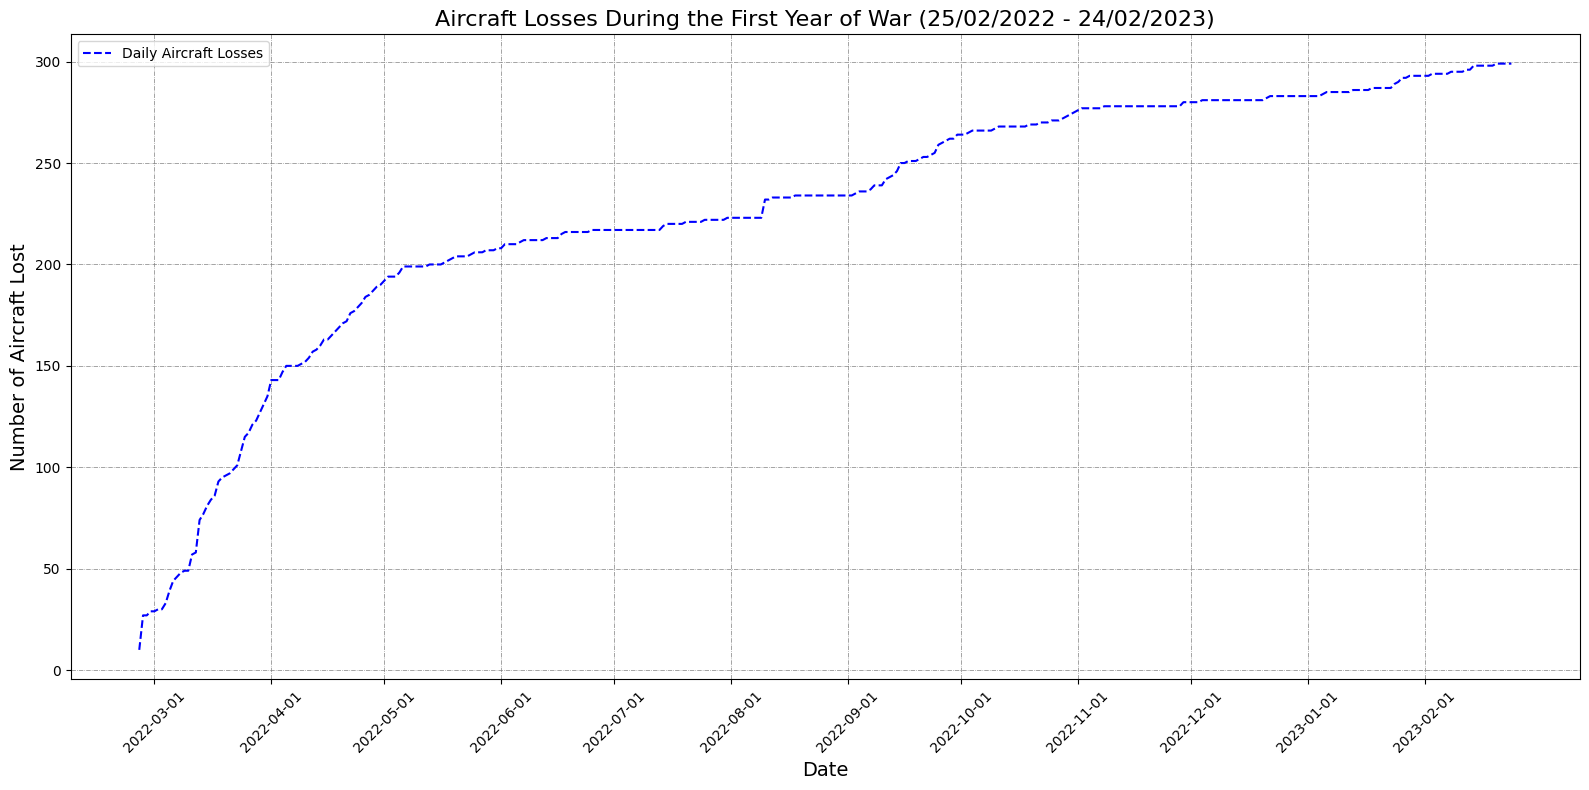

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filename = 'russia_losses_equipment.csv'
column_name = 'aircraft'
date_column = 'date'

def extract_numeric_column(filename, column_name, date_column='date'):
    df = pd.read_csv(filename)
    
    df['date'] = pd.to_datetime(df[date_column], format='%Y-%m-%d', errors='coerce')
    
    invalid_dates = df['date'].isna().sum()
    if invalid_dates > 0:
        print(f"Warning: {invalid_dates} invalid dates were replaced with NaT.")
    
    df = df.sort_values(by='date', ascending=True)
    
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce').fillna(0.0)
    
    return df

# Extracting and preparing data
df = extract_numeric_column(filename, column_name, date_column)

print("First 40 elements of aircraft_losses:")
print(df[column_name].values[:40])

# Defining the start and end dates for the first year of the war
start_date = pd.to_datetime('2022-02-25')
end_date = start_date + pd.DateOffset(years=1) - pd.DateOffset(days=1)  # February 24, 2023

first_year_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

print(f"\nNumber of records for the first year of the war: {len(first_year_df)}")

aircraft_losses_first_year = first_year_df[column_name].values

# Creating the plot
plt.figure(figsize=(16, 8), dpi=100)

plt.plot(
    first_year_df['date'], 
    first_year_df['aircraft'], 
    linestyle='--', 
    color='blue', 
    label='Daily Aircraft Losses'
)

plt.title('Aircraft Losses During the First Year of War (25/02/2022 - 24/02/2023)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Aircraft Lost', fontsize=14)

plt.xticks(
    pd.date_range(start=start_date, end=end_date, freq='MS'), 
    rotation=45
)

plt.grid(
    True, 
    which='both', 
    linestyle='-.', 
    linewidth=0.5, 
    color='grey'
)

plt.legend()
plt.tight_layout()
plt.savefig('first_year_aircraft_losses.png', format='png')

plt.show()

---

## 🏁 **Conclusion**

> Having completed this laboratory work, I acquired skills in **data processing and visualization using Python's libraries such as pandas, NumPy and matplotlib.**

---